In [76]:
import pandas as pd
df=pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")
df

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0
...,...,...,...,...,...,...,...
1913,19/01/2023,11337,8671,262,14881,0,66.0
1914,16/08/2023,16791,11800,387,20936,4684,113.0
1915,10/01/2022,5732,3548,73,6644,0,25.0
1916,04/05/2020,3717,1952,70,4411,131,19.0



Preprocessing

---



In [23]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [25]:
df.dtypes

,0
Date,object
Local Route,int64
Light Rail,int64
Peak Service,int64
Rapid Route,int64
School,int64
Other,float64


In [26]:
df.isnull().sum()

,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


In [77]:
#converting date to datetime format
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

#sorting the data column
df=df.sort_values('Date')
df

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1013,2019-07-01,15987,9962,407,21223,3715,NaN
1120,2019-07-02,16895,10656,409,21715,3993,NaN
1451,2019-07-03,16613,10658,427,22025,3638,NaN
1171,2019-07-04,16604,10445,437,21868,3576,NaN
1523,2019-07-05,16040,10532,400,20697,2856,NaN
...,...,...,...,...,...,...,...
1662,2024-09-25,21,0,1,10,8,NaN
1330,2024-09-26,9,0,0,0,2,NaN
1731,2024-09-27,6,0,0,13,0,NaN
1652,2024-09-28,1,0,0,4,0,NaN


In [78]:
df.set_index('Date',inplace=True)
df

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,NaN
2019-07-02,16895,10656,409,21715,3993,NaN
2019-07-03,16613,10658,427,22025,3638,NaN
2019-07-04,16604,10445,437,21868,3576,NaN
2019-07-05,16040,10532,400,20697,2856,NaN
...,...,...,...,...,...,...
2024-09-25,21,0,1,10,8,NaN
2024-09-26,9,0,0,0,2,NaN
2024-09-27,6,0,0,13,0,NaN


In [79]:
#since the missing values are in the first and last few rows replacing with the mean of the column
median_value=df['Other'].median()
df['Other']=df['Other'].fillna(median_value)
df

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,40.0
2019-07-02,16895,10656,409,21715,3993,40.0
2019-07-03,16613,10658,427,22025,3638,40.0
2019-07-04,16604,10445,437,21868,3576,40.0
2019-07-05,16040,10532,400,20697,2856,40.0
...,...,...,...,...,...,...
2024-09-25,21,0,1,10,8,40.0
2024-09-26,9,0,0,0,2,40.0
2024-09-27,6,0,0,13,0,40.0


In [45]:
df

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,43.390411
2019-07-02,16895,10656,409,21715,3993,43.390411
2019-07-03,16613,10658,427,22025,3638,43.390411
2019-07-04,16604,10445,437,21868,3576,43.390411
2019-07-05,16040,10532,400,20697,2856,43.390411
...,...,...,...,...,...,...
2024-09-25,21,0,1,10,8,43.390411
2024-09-26,9,0,0,0,2,43.390411
2024-09-27,6,0,0,13,0,43.390411


Checking for outliers

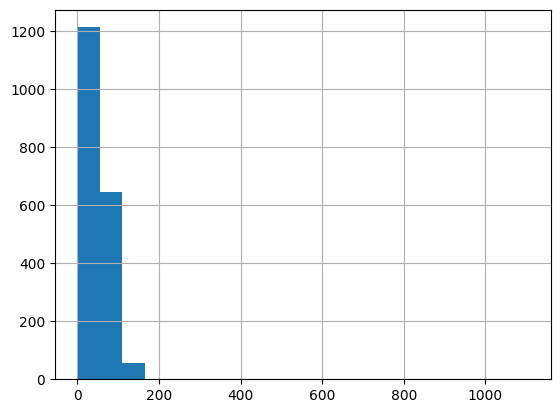

In [50]:
import matplotlib.pyplot as plt
df['Other'].hist(bins=20)
plt.show()


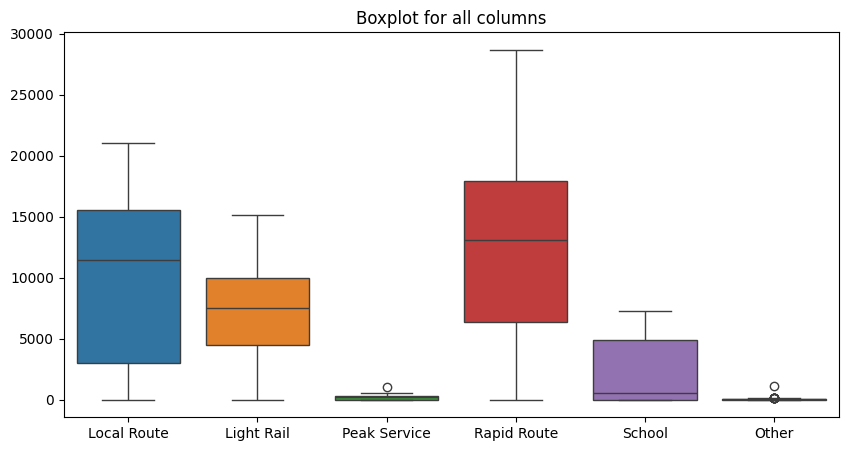

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title("Boxplot")
plt.show()


In [52]:
Q1 = df['Other'].quantile(0.25)
Q3 = df['Other'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Detect outliers
outliers = df[(df['Other'] < lower_bound) | (df['Other'] > upper_bound)]
print(outliers)


            Local Route  Light Rail  Peak Service  Rapid Route  School   Other
Date                                                                          
2019-10-27         3020        5112             0         6761       0   171.0
2020-03-06        19515       12465           386        26030    6147   150.0
2021-03-31        16718        9942           294        18162    5493   161.0
2022-05-06        12690        8920           162        13686    3786  1105.0
2022-11-23        14492        9646           266        16659    3916   176.0
2023-02-06        16019       10179           307        18489    5868   160.0
2023-03-02        17478       11640           333        20972    5190   159.0
2023-07-21        15700       10657           200        18176    4714   151.0
2023-08-09        16458       12116           393        20886    4575   149.0
2023-08-21        15616       10487           364        19386    4704   162.0


In [53]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.355057
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.529968
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,15.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,67.750000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


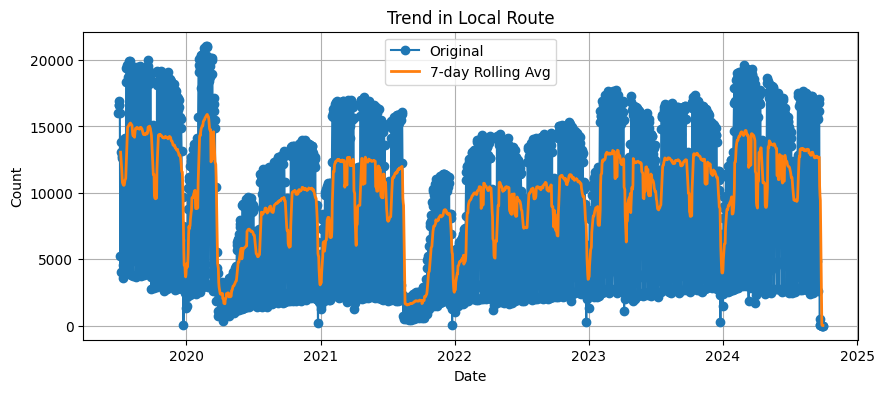

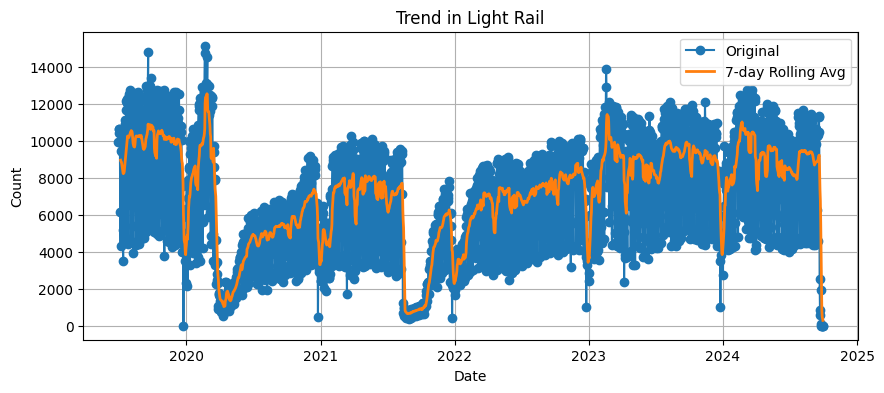

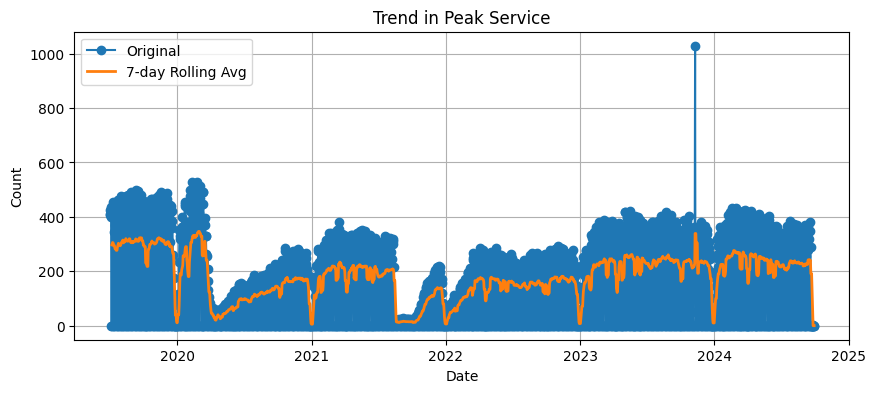

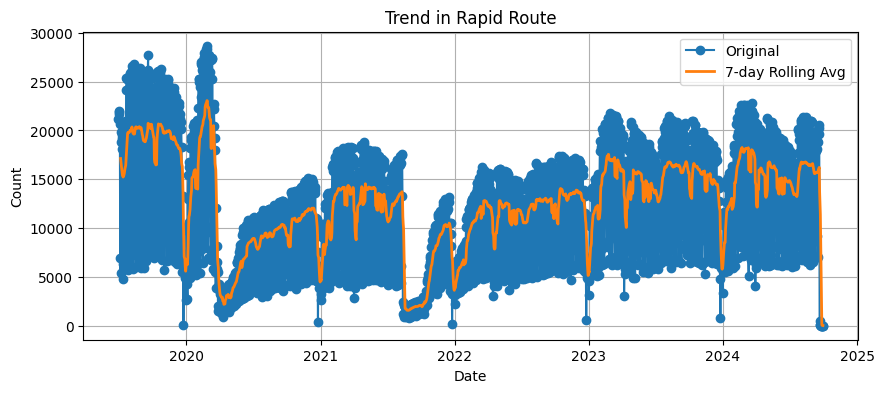

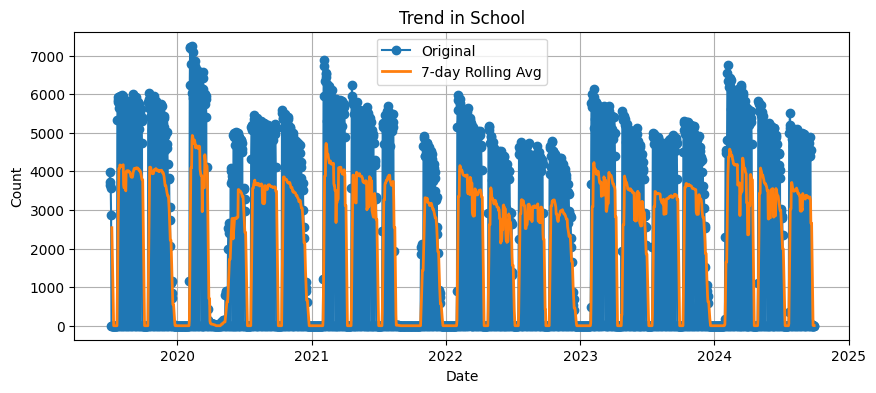

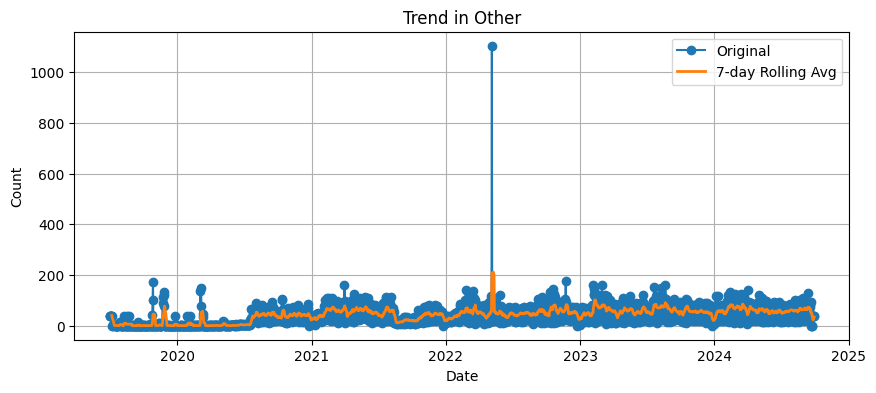

In [60]:
for col in df.columns:
    plt.figure(figsize=(10,4))
    plt.plot(df[col], label='Original', marker='o')
    plt.plot(df[col].rolling(7).mean(), label='7-day Rolling Avg', linewidth=2)
    plt.title(f'Trend in {col}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()


In [117]:
#correlation matrix
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)


              Local Route  Light Rail  Peak Service  Rapid Route    School  \
Local Route      1.000000    0.918795      0.944390     0.965122  0.852356   
Light Rail       0.918795    1.000000      0.879347     0.967736  0.685795   
Peak Service     0.944390    0.879347      1.000000     0.944997  0.728795   
Rapid Route      0.965122    0.967736      0.944997     1.000000  0.754290   
School           0.852356    0.685795      0.728795     0.754290  1.000000   
Other            0.469193    0.421638      0.377554     0.378470  0.429092   

                 Other  
Local Route   0.469193  
Light Rail    0.421638  
Peak Service  0.377554  
Rapid Route   0.378470  
School        0.429092  
Other         1.000000  


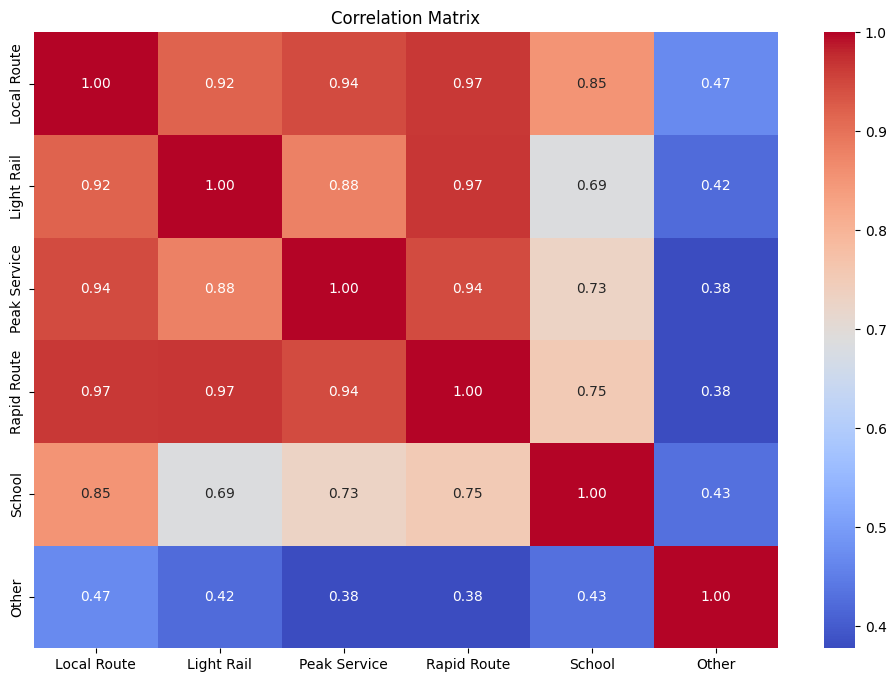

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Feature engineering

In [80]:
import pandas as pd

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['WeekOfYear'] = df.index.isocalendar().week
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

In [81]:
# Total traffic across all routes
df['TotalTraffic'] = df[['Local Route','Light Rail','Peak Service','Rapid Route','School','Other']].sum(axis=1)

# Ratio features
df['Local_Ratio'] = df['Local Route'] / df['TotalTraffic']
df['LightRail_Ratio'] = df['Light Rail'] / df['TotalTraffic']
df['Peak_Ratio'] = df['Peak Service'] / df['TotalTraffic']
df['Rapid_Ratio'] = df['Rapid Route'] / df['TotalTraffic']

In [82]:
# Lag features (previous day's traffic)
df['Local_Lag1'] = df['Local Route'].shift(1)
df['Total_Lag1'] = df['TotalTraffic'].shift(1)

# Rolling averages (last 3 observations)
df['Local_Rolling3'] = df['Local Route'].rolling(window=3).mean()
df['Total_Rolling3'] = df['TotalTraffic'].rolling(window=3).mean()


In [84]:
df

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Year,Month,Day,DayOfWeek,...,IsWeekend,TotalTraffic,Local_Ratio,LightRail_Ratio,Peak_Ratio,Rapid_Ratio,Local_Lag1,Total_Lag1,Local_Rolling3,Total_Rolling3
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,15987,9962,407,21223,3715,40.0,2019,7,1,0,...,0,51334.0,0.311431,0.194062,0.007928,0.413430,NaN,NaN,NaN,NaN
2019-07-02,16895,10656,409,21715,3993,40.0,2019,7,2,1,...,0,53708.0,0.314571,0.198406,0.007615,0.404316,15987.0,51334.0,NaN,NaN
2019-07-03,16613,10658,427,22025,3638,40.0,2019,7,3,2,...,0,53401.0,0.311099,0.199584,0.007996,0.412445,16895.0,53708.0,16498.333333,52814.333333
2019-07-04,16604,10445,437,21868,3576,40.0,2019,7,4,3,...,0,52970.0,0.313460,0.197187,0.008250,0.412837,16613.0,53401.0,16704.000000,53359.666667
2019-07-05,16040,10532,400,20697,2856,40.0,2019,7,5,4,...,0,50565.0,0.317215,0.208286,0.007911,0.409315,16604.0,52970.0,16419.000000,52312.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,21,0,1,10,8,40.0,2024,9,25,2,...,0,80.0,0.262500,0.000000,0.012500,0.125000,36.0,178.0,37.666667,776.333333
2024-09-26,9,0,0,0,2,40.0,2024,9,26,3,...,0,51.0,0.176471,0.000000,0.000000,0.000000,21.0,80.0,22.000000,103.000000
2024-09-27,6,0,0,13,0,40.0,2024,9,27,4,...,0,59.0,0.101695,0.000000,0.000000,0.220339,9.0,51.0,12.000000,63.333333


In [118]:
route_cols = ["Local Route","Light Rail","Peak Service","Rapid Route","School","Other"]

contrib = (df[route_cols].sum() / df["TotalTraffic"].sum()) * 100
print("Contribution of each route to total traffic\n")
print(contrib.sort_values(ascending=False))

Contribution of each route to total traffic

Rapid Route     39.049398
Local Route     30.661784
Light Rail      22.304762
School           7.292988
Peak Service     0.556674
Other            0.134394
dtype: float64


Correlation among major routes



<Axes: >

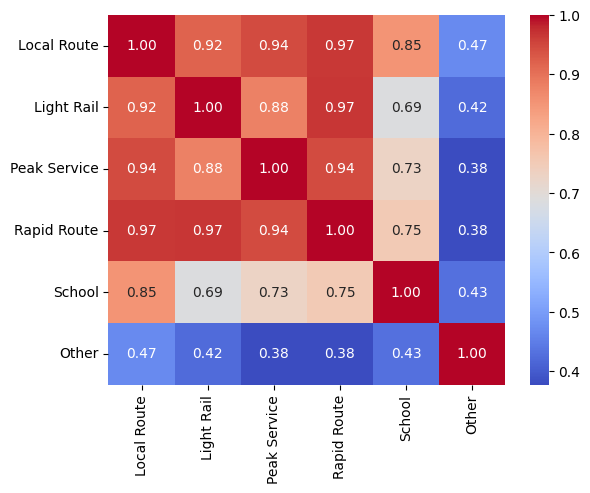

In [99]:
print("Correlation among major routes\n")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


Insights

1.Light Rail and Rapid Route show the highest contribution across most days.

2.Local Route, Light Rail, and Rapid Route show a strong positive correlation, indicating that they rise and fall together.

3.When school routes are active, the system experiences more than double the total traffic compared to inactive days.

4.Traffic is lower on weekends compared to weekdays

5.Rapid Route traffic experiences the largest fluctuations indicator of peak travel days

In [100]:
school_active = df[df["School"] > 0]["TotalTraffic"].mean()
school_inactive = df[df["School"] == 0]["TotalTraffic"].mean()

print("Impact of School route\n")
print("Average TotalTraffic when School active :", school_active)
print("Average TotalTraffic when School inactive:", school_inactive)

Impact of School route

Average TotalTraffic when School active : 45161.066863323504
Average TotalTraffic when School inactive: 17697.306326304108


In [101]:
weekday_traffic = df[df["IsWeekend"] == 0]["TotalTraffic"].mean()
weekend_traffic = df[df["IsWeekend"] == 1]["TotalTraffic"].mean()

print("Weekday vs Weekend\n")
print("Avg Weekday Traffic :", weekday_traffic)
print("Avg Weekend Traffic :", weekend_traffic)


Weekday vs Weekend

Avg Weekday Traffic : 40006.74306569343
Avg Weekend Traffic : 12892.043795620439


In [102]:
print("ROUTE VARIABILITY \n")
variability = df[["Local Route","Light Rail","Peak Service","Rapid Route","School","Other"]].std()
print(variability.sort_values(ascending=False))

ROUTE VARIABILITY 

Rapid Route     6720.494557
Local Route     6120.715714
Light Rail      3345.616428
School          2494.766306
Peak Service     156.532738
Other             41.529968
dtype: float64


In [104]:
df.columns

Index(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School',
       'Other', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'IsWeekend',
       'TotalTraffic', 'Local_Ratio', 'LightRail_Ratio', 'Peak_Ratio',
       'Rapid_Ratio', 'Local_Lag1', 'Total_Lag1', 'Local_Rolling3',
       'Total_Rolling3', 'ActiveRoutes'],
      dtype='object')

Forecasting the routes for 7 days

In [108]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

routes = ['Local Route','Light Rail','Peak Service','Rapid Route','School','Other']

#rolling features for each route
for route in routes:
    df[route+'_Lag1'] = df[route].shift(1)
    df[route+'_Roll3'] = df[route].rolling(3).mean()

# filling null values using backward fill
df.fillna(method='bfill', inplace=True)

features = ['Year','Month','Day','DayOfWeek','IsWeekend',
            'Local_Ratio','LightRail_Ratio','Peak_Ratio','Rapid_Ratio','ActiveRoutes']

# Adding new rolling features to features
for route in routes:
    features.append(route+'_Lag1')
    features.append(route+'_Roll3')


future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=7)
forecast_results = pd.DataFrame(index=future_dates)

#train for each routes
for route in routes:
    # Train model
    X_train = df[features]
    y_train = df[route]

    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)

    # Prepare future features
    future = forecast_results.copy()
    future['Year'] = future.index.year
    future['Month'] = future.index.month
    future['Day'] = future.index.day
    future['DayOfWeek'] = future.index.dayofweek
    future['IsWeekend'] = future['DayOfWeek'].isin([5,6]).astype(int)

    # Route-specific lag/rolling features using last row or last 3 rows
    last_row = df.iloc[-1]
    last3 = df.tail(3)

    for r in routes:
        future[r+'_Lag1'] = last_row[r]
        future[r+'_Roll3'] = last3[r].mean()

    # Ratios & ActiveRoutes
    future['Local_Ratio'] = df['Local_Ratio'].mean()
    future['LightRail_Ratio'] = df['LightRail_Ratio'].mean()
    future['Peak_Ratio'] = df['Peak_Ratio'].mean()
    future['Rapid_Ratio'] = df['Rapid_Ratio'].mean()
    future['ActiveRoutes'] = df['ActiveRoutes'].mean()

    # Predict
    future[route+'_Forecast'] = model.predict(future[features])

    # Save predictions
    forecast_results[route+'_Forecast'] = future[route+'_Forecast']

forecast_results[[r+'_Forecast' for r in routes]]


/tmp/ipython-input-2804839259.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


,Local Route_Forecast,Light Rail_Forecast,Peak Service_Forecast,Rapid Route_Forecast,School_Forecast,Other_Forecast
2024-09-30,1652.060000,243.790000,38.580000,1234.783333,2.500000,45.573333
2024-10-01,1727.596667,274.293333,39.673333,1423.383333,2.470000,43.726667
2024-10-02,1726.636667,274.073333,39.233333,1423.766667,2.470000,43.400000
2024-10-03,1729.586667,260.483333,39.113333,1419.666667,2.436667,43.280000
2024-10-04,1727.653333,257.070000,39.026667,1410.056667,2.416667,43.450000
2024-10-05,1725.206667,236.933333,39.026667,1366.740000,2.453333,43.396667
2024-10-06,1721.666667,238.696667,39.016667,1371.046667,2.453333,43.316667


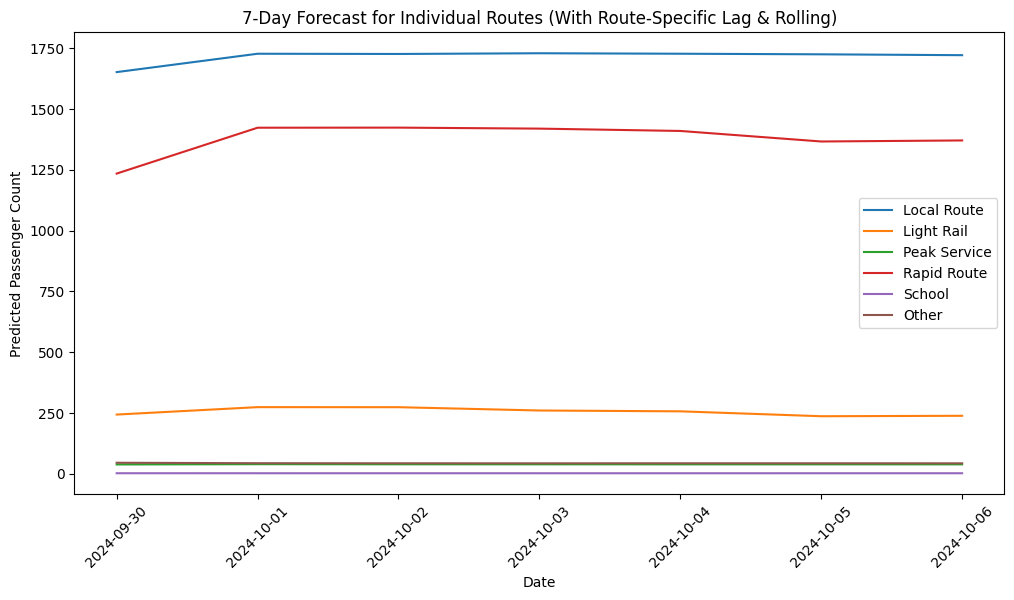

In [109]:
plt.figure(figsize=(12,6))
for route in routes:
    plt.plot(forecast_results.index, forecast_results[route+'_Forecast'], label=route)
plt.title("7-Day Forecast for Individual Routes (With Route-Specific Lag & Rolling)")
plt.xlabel("Date")
plt.ylabel("Predicted Passenger Count")
plt.legend()
plt.xticks(rotation=45)
plt.show()
